<a href="https://colab.research.google.com/github/Nishitha-12/MajorProj2022/blob/main/Test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
Reviewdata = pd.read_csv('IRSE_FIRE_2022_Track_Training_Data_preprocessed.csv')

In [6]:
cd /content/drive/MyDrive/IRSE

/content/drive/MyDrive/IRSE


In [7]:
Reviewdata.head()

,Comments,SurroundingCodeContext,Class
0,/*test 529*/,-10. int res = 0;\n-9. CURL *curl = NULL;\...,Not Useful
1,/*test 525*/,"-2. fprintf(stderr, ""Usage: lib529 [url] [...",Not Useful
2,/*done*/,"-10. multi_add_handle(m, curl);\n-9. for(;...",Not Useful
3,/*test 529*/,-10. int res = 0;\n-9. CURL *curl = NULL;\...,Not Useful
4,/*test 525*/,"-2. fprintf(stderr, ""Usage: lib529 [url] [...",Not Useful


In [8]:
Reviewdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Comments                8047 non-null   object
 1   SurroundingCodeContext  8047 non-null   object
 2   Class                   8047 non-null   object
dtypes: object(3)
memory usage: 188.7+ KB


In [9]:
Reviewdata.describe().transpose()

,count,unique,top,freq
Comments,8047,4992,/*********************************************...,144
SurroundingCodeContext,8047,5949,-5. namespace mu\n-4. {\n-3. \tstd::locale Par...,52
Class,8047,2,Useful,4337


# **DATA CLEANING**

In [10]:
count = Reviewdata.isnull().sum().sort_values(ascending=False)
percentage = ((Reviewdata.isnull().sum()/len(Reviewdata)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1,
keys=['Count','Percentage'])

print('Count and percentage of missing values for the columns:')

missing_data

Count and percentage of missing values for the columns:


,Count,Percentage
Comments,0,0.0
SurroundingCodeContext,0,0.0
Class,0,0.0


Percentage for default

Useful        53.9
Not Useful    46.1
Name: Class, dtype: float64


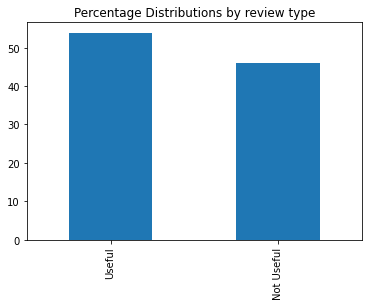

In [11]:
### Checking for the Distribution of Default ###
import matplotlib.pyplot as plt
%matplotlib inline
print('Percentage for default\n')
print(round(Reviewdata.Class.value_counts(normalize=True)*100,2))
round(Reviewdata.Class.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()

In [12]:
# Apply first level cleaning
import re
import string

#This function converts to lower-case, removes square bracket, removes numbers and punctuation
def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

cleaned1 = lambda x: text_clean_1(x)

In [13]:
# Let's take a look at the updated text
Reviewdata['cleaned_description'] = pd.DataFrame(Reviewdata.Comments.apply(cleaned1))
Reviewdata.head(10)

,Comments,SurroundingCodeContext,Class,cleaned_description
0,/*test 529*/,-10. int res = 0;\n-9. CURL *curl = NULL;\...,Not Useful,test
1,/*test 525*/,"-2. fprintf(stderr, ""Usage: lib529 [url] [...",Not Useful,test
2,/*done*/,"-10. multi_add_handle(m, curl);\n-9. for(;...",Not Useful,done
3,/*test 529*/,-10. int res = 0;\n-9. CURL *curl = NULL;\...,Not Useful,test
4,/*test 525*/,"-2. fprintf(stderr, ""Usage: lib529 [url] [...",Not Useful,test
5,/*argv1 = URL\n * argv2 = proxy\n * argv3 = no...,"-9. *\n-8. * You may opt to use, copy, modif...",Not Useful,url\n proxy\n nonzero means ascii tran...
6,/*enable ascii/text mode*/,"-10. if(!curl) {\n-9. fprintf(stderr, ""c...",Not Useful,enable asciitext mode
7,/*100 ms*/,"-10. multi_add_handle(mhandle, handle);\n-9....",Not Useful,ms
8,/*on failure don't abort just issue a warning*/,-10. * point the resulting soft limit is ou...,Not Useful,on failure dont abort just issue a warning
9,/*on failure don't abort just issue a warning*/,-10. * point the resulting soft limit is ou...,Not Useful,on failure dont abort just issue a warning


In [14]:
# Apply a second round of cleaning
def text_clean_2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

cleaned2 = lambda x: text_clean_2(x)

In [15]:
# Let's take a look at the updated text
Reviewdata['cleaned_description_new'] = pd.DataFrame(Reviewdata['cleaned_description'].apply(cleaned2))
Reviewdata.head(10)

,Comments,SurroundingCodeContext,Class,cleaned_description,cleaned_description_new
0,/*test 529*/,-10. int res = 0;\n-9. CURL *curl = NULL;\...,Not Useful,test,test
1,/*test 525*/,"-2. fprintf(stderr, ""Usage: lib529 [url] [...",Not Useful,test,test
2,/*done*/,"-10. multi_add_handle(m, curl);\n-9. for(;...",Not Useful,done,done
3,/*test 529*/,-10. int res = 0;\n-9. CURL *curl = NULL;\...,Not Useful,test,test
4,/*test 525*/,"-2. fprintf(stderr, ""Usage: lib529 [url] [...",Not Useful,test,test
5,/*argv1 = URL\n * argv2 = proxy\n * argv3 = no...,"-9. *\n-8. * You may opt to use, copy, modif...",Not Useful,url\n proxy\n nonzero means ascii tran...,url proxy nonzero means ascii transfer
6,/*enable ascii/text mode*/,"-10. if(!curl) {\n-9. fprintf(stderr, ""c...",Not Useful,enable asciitext mode,enable asciitext mode
7,/*100 ms*/,"-10. multi_add_handle(mhandle, handle);\n-9....",Not Useful,ms,ms
8,/*on failure don't abort just issue a warning*/,-10. * point the resulting soft limit is ou...,Not Useful,on failure dont abort just issue a warning,on failure dont abort just issue a warning
9,/*on failure don't abort just issue a warning*/,-10. * point the resulting soft limit is ou...,Not Useful,on failure dont abort just issue a warning,on failure dont abort just issue a warning


# **MODEL TRAINING**

In [16]:
from sklearn.model_selection import train_test_split

Independent_var = Reviewdata.cleaned_description_new
#Independent_var2 = Reviewdata.cleaned_code_new
Dependent_var = Reviewdata.Class

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size = 0.1, random_state = 225)

print('IV_train :', len(IV_train))
print('IV_test  :', len(IV_test))
print('DV_train :', len(DV_train))
print('DV_test  :', len(DV_test))

IV_train : 7242
IV_test  : 805
DV_train : 7242
DV_test  : 805


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")


from sklearn.pipeline import Pipeline

In [18]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(IV_train, DV_train)


from sklearn.metrics import confusion_matrix

predictions = model.predict(IV_test)

confusion_matrix(predictions, DV_test)

array([[259,  99],
       [ 99, 348]])

# **MODEL PREDICTION**

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(predictions, DV_test))
print("Precision : ", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, DV_test, average = 'weighted'))

Accuracy :  0.7540372670807454
Precision :  0.7540372670807454
Recall :  0.7540372670807454


# **TRYING ON EXAMPLES**

In [20]:
example = ["/*Backwards compatibility.*/"]
result = model.predict(example)

print(result)

['Not Useful']
